# Школа глубокого обучения

<a href="https://mipt.ru/science/labs/laboratoriya-neyronnykh-sistem-i-glubokogo-obucheniya/"><img align="right" src="https://avatars1.githubusercontent.com/u/29918795?v=4&s=200" alt="DeepHackLab" style="position:relative;top:-40px;right:10px;height:100px;" /></a>



### Физтех-Школа Прикладной математики и информатики МФТИ 
### Лаборатория нейронных сетей и глубокого обучения (DeepHackLab)  
 Дедлайн -- 11 ноября

## Домашнее задание 1
### Основы Python и пакет NumPy
---


In [52]:
import numpy as np
import random
import scipy.stats as sps

### Задача 1
В первой задаче вам предлагается перемножить две квадратные матрицы двумя способами -- без использования пакета ***numpy*** и с ним.

In [53]:
# Для генерации матриц используем фукнцию random -- она используется для генерации случайных объектов 
# функция sample создает случайную выборку. В качестве аргумента ей передается кортеж (i,j), здесь i -- число строк,
# j -- число столбцов.
a = np.random.sample((98,1003))
b = np.random.sample((1003,31))
# выведите размерность (ранг) каждой матрицы с помощью функции ndim.
# Используйте функцию shape, что она вывела?
# ========
print(a.ndim)
print(b.ndim)
print(a.shape)
print(b.shape)
# ========

2
2
(98, 1003)
(1003, 31)


In [54]:
def mult(a, b):
    a_r = a.shape
    b_r = b.shape
    start = a_r[0]
    finish = b_r[1]
    un = a_r[1]
    c = [[0 for i in range(finish)] for j in range(start)]
    for i in range(start):
        for j in range(finish):
            for k in range(un):
                c[i][j] += a[i][k] * b[k][j]
    

In [55]:
def np_mult(a, b):
    c = np.dot(a, b)

In [56]:
%%time
# засечем время работы функции без NumPy
mult(a,b)

CPU times: user 8.91 s, sys: 4 ms, total: 8.91 s
Wall time: 9.09 s


In [57]:
%%time
# засечем время работы функции с NumPy
np_mult(a,b)

CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 8.44 ms


### Задача 2
Напишите функцию, которая по данной последовательности $\{A_i\}_{i=1}^n$ строит последовательность $S_n$, где $S_k = \frac{A_1 + ... + A_k}{k}$.  
Аналогично -- с помощью библиотеки **NumPy** и без нее. Сравните скорость, объясните результат.

In [86]:
# функция, решающая задачу с помощью NumPy
def sec_av(A):
    return np.divide(np.cumsum(A), np.arange(1, len(A)+1))
    

In [89]:
# функция без NumPy
def stupid_sec_av(A):
    S = [0 for i in range(len(A))]
    x = 0
    for i in range(len(A)):
        x += A[i]
        S[i] = x / (i+1)
    return S

# зададим некоторую последовательность и проверим ее на ваших функциях. 
# Первая функция должна работать ~ в 50 раз быстрее
A = sps.uniform.rvs(size=10 ** 7) 

%time S1 = sec_av(A)
%time S2 = stupid_sec_av(A)
#проверим корректность:
np.abs(S1 - S2).sum()

CPU times: user 228 ms, sys: 208 ms, total: 436 ms
Wall time: 438 ms
CPU times: user 24.6 s, sys: 160 ms, total: 24.8 s
Wall time: 25.1 s


2.4874546866726632e-13

### Задача 3

Пусть задан некоторый массив $X$. Надо построить новый массив, где все элементы с нечетными индексами требуется заменить на число $a$ (если оно не указано, то на 1). Все четные элементы исходного массива нужно возвести в куб и записать в обратном порядке относительно позиций этих элементов. Массив $X$ при этом должен остаться без изменений. В конце требуется слить массив X с преобразованным X и вывести в обратном порядке. 

In [165]:
# функция, решающая задачу с помощью NumPy
def transformation(X, a):
    A = X.copy()
    A[1::2] = a
    B = np.power(X[::2],3)[::-1]
    return np.concatenate((X, A, B), axis=0)[::-1]

In [166]:
# функция, решающая задачу  без NumPy
def stupid_transformation(X, a):
    Copy = [X[i] for i in range(len(X))]
    for i in range(len(X)):
        if i % 2 != 0:
            Copy[i] = a
    Z = []
    for i in range(len(X)):
        if i % 2 == 0:
            Z += [X[i] ** 3]
    Copy += Z[::-1]
    Ans = np.concatenate((X, Copy), axis=0)
    return Ans[::-1]

In [167]:
X = sps.uniform.rvs(size=10**5) 
a = 7
# здесь код эффективнее примерно в 20 раз. 
# если Вы вдруг соберетесь печатать массив без np -- лучше сначала посмотрите на его размер
%time S1 = transformation(X, a)
%time S2 = stupid_transformation(X, a)
# проверим корректность:
np.abs(S1 - S2).sum()

[ 0.42518422  0.45552387  0.81791433 ...,  0.49708689  0.0108226
  0.32821819]
CPU times: user 8 ms, sys: 0 ns, total: 8 ms
Wall time: 8.31 ms
CPU times: user 288 ms, sys: 8 ms, total: 296 ms
Wall time: 333 ms


0.0

Почему методы ***numpy*** оказываются эффективнее?

In [ ]:
# Ваш ответ

## Дополнительные задачи

Дополнительные задачи подразумевают, что Вы самостоятельно разберётесь в некоторых функциях ***numpy***, чтобы их сделать.  

Эти задачи не являются обязательными, но могут повлиять на Ваш рейтинг в лучшую сторону (точные правила учёта доп. задач будут оглашены позже).

### Задача 4*

Дана функция двух переменных: $f(x, y) = sin(x)cos(y)$ (это просто такой красивый 3D-график), а также дана функция для отрисовки $f(x, y)$ (`draw_f()`), которая принимает на вход двумерную сетку, на которой будет вычисляться функция.  

Вам нужно разобраться в том, как строить такие сетки (подсказка - это одна конкретная функция ***numpy***), и подать такую сетку на вход функции отрисовки.

In [181]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

def f(x, y):
    '''Функция двух переменных'''
    return np.sin(x) * np.cos(y)

def draw_f(grid_x, grid_y):
    '''Функция отрисовки функции f(x, y)'''
    fig = plt.figure(figsize=(10, 8))
    ax = Axes3D(fig)
    ax.plot_surface(grid_x, grid_y, f(grid_x, grid_y), cmap='inferno')
    plt.show()

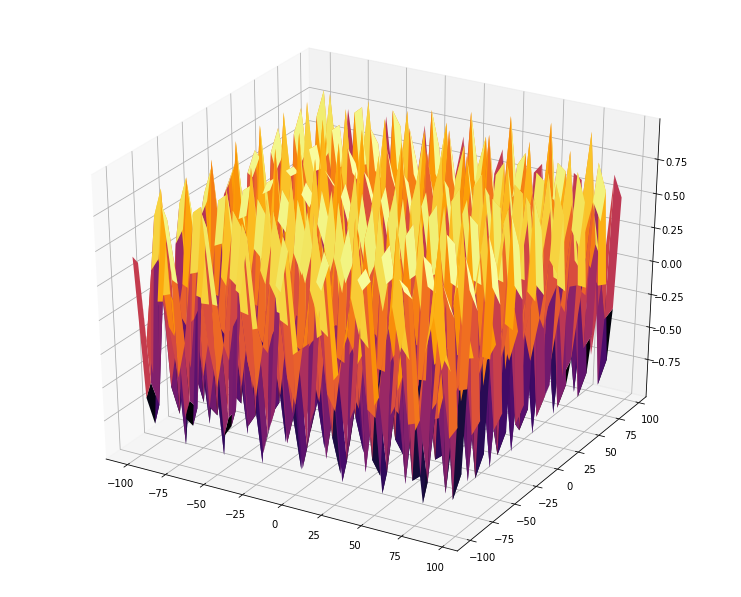

In [183]:
a = np.arange(-100, 100, 5)
grid_x, grid_y = np.meshgrid(a, a)

draw_f(grid_x, grid_y)

### Задача 5*

Вам дана картинка. При загрузке её размерность равна 3: **(w, h, num_channels)**, где **w** - ширина картинки в пикселях, **h** - высота картинки в пикселях, **num_channels** - количество каналов *(R, G, B, alpha)*.

Вам нужно "развернуть" картинку в одномерный массив размера w \* h \* num_channels, написав **одну строку кода**.

In [169]:
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
path_to_image = './image.png'
image_array = plt.imread(path_to_image)
plt.imshow(image_array);

In [ ]:
flat_image_array = np.flat(image_array)

In [ ]:
print(flat_image_array.shape)